In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from IPython.display import display

## Dataset

Attribute Information

1. id	Diamond identification number provided by Brilliant Earth
2. url	URL for the diamond details page
3. shape	External geometric appearance of a diamond
4. price	Price in U.S. dollars
5. carat	Unit of measurement used to describe the weight of a diamond
6. cut	Facets, symmetry, and reflective qualities of a diamond
7. color	Natural color or lack of color visible within a diamond, based on the GIA grade scale
8. clarity	Visibility of natural microscopic inclusions and imperfections within a diamond
9. report	Diamond certificate or grading report provided by an independent gemology lab
10. type	Natural or lab created diamonds
11. date_fetched	Date the data was fetched

In [3]:
df = pd.read_csv('diamonds_dataset.csv')
df.head()

,id,url,shape,price,carat,cut,color,clarity,report,type,date_fetched
0,10086429,https://www.brilliantearth.com//loose-diamonds...,Round,400,0.30,Very Good,J,SI2,GIA,natural,2020-11-29 12-26 PM
1,10016334,https://www.brilliantearth.com//loose-diamonds...,Emerald,400,0.31,Ideal,I,SI1,GIA,natural,2020-11-29 12-26 PM
2,9947216,https://www.brilliantearth.com//loose-diamonds...,Emerald,400,0.30,Ideal,I,VS2,GIA,natural,2020-11-29 12-26 PM
3,10083437,https://www.brilliantearth.com//loose-diamonds...,Round,400,0.30,Ideal,I,SI2,GIA,natural,2020-11-29 12-26 PM
4,9946136,https://www.brilliantearth.com//loose-diamonds...,Emerald,400,0.30,Ideal,I,SI1,GIA,natural,2020-11-29 12-26 PM


In [4]:
df.drop(['id', 'url', 'date_fetched'], axis=1, inplace=True)

### Data cleaning and exploration

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119307 entries, 0 to 119306
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   shape    119307 non-null  object 
 1   price    119307 non-null  int64  
 2   carat    119307 non-null  float64
 3   cut      119307 non-null  object 
 4   color    119307 non-null  object 
 5   clarity  119307 non-null  object 
 6   report   119307 non-null  object 
 7   type     119307 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 7.3+ MB


### Null values

In [6]:
df.isna().sum()

shape      0
price      0
carat      0
cut        0
color      0
clarity    0
report     0
type       0
dtype: int64

### Duplicates

In [7]:
df[df.duplicated()]

,shape,price,carat,cut,color,clarity,report,type
11,Round,410,0.30,Very Good,J,SI2,GIA,natural
13,Round,410,0.30,Very Good,J,SI2,GIA,natural
14,Round,410,0.30,Very Good,J,SI2,GIA,natural
17,Round,410,0.30,Very Good,J,SI2,GIA,natural
30,Round,420,0.30,Very Good,J,SI2,GIA,natural
...,...,...,...,...,...,...,...,...
118951,Round,27030,2.73,Super Ideal,D,VVS1,GCAL,lab
119116,Round,34080,3.07,Super Ideal,D,VVS1,IGI,lab
119151,Round,36520,3.29,Super Ideal,D,VVS1,IGI,lab
119158,Round,37180,3.35,Super Ideal,D,VVS1,IGI,lab


In [8]:
df.drop_duplicates(inplace=True, ignore_index=True)

### Summary statistics for features

In [9]:
df.describe()

,price,carat
count,8.662700e+04,86627.000000
mean,3.899580e+03,0.966458
std,1.058300e+04,0.710722
min,2.700000e+02,0.250000
25%,1.050000e+03,0.500000
50%,2.110000e+03,0.750000
75%,4.180000e+03,1.200000
max,1.348720e+06,15.320000


In [10]:
df.columns

Index(['shape', 'price', 'carat', 'cut', 'color', 'clarity', 'report', 'type'], dtype='object')

In [11]:
categorical = ['shape', 'cut', 'color','clarity', 'report','type']
numerical = ['carat']
for val in categorical:
    print(val)
    print(df[val].unique(), '\n')

shape
['Round' 'Emerald' 'Marquise' 'Princess' 'Pear' 'Heart' 'Oval' 'Cushion'
 'Asscher' 'Radiant'] 

cut
['Very Good' 'Ideal' 'Super Ideal' 'Good' 'Fair'] 

color
['J' 'I' 'E' 'F' 'G' 'H' 'D'] 

clarity
['SI2' 'SI1' 'VS2' 'VVS1' 'VS1' 'VVS2' 'IF' 'FL'] 

report
['GIA' 'HRD' 'IGI' 'GCAL'] 

type
['natural' 'lab'] 



## Train test split

In [12]:
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=4)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=4)

## EDA

### Categorical features

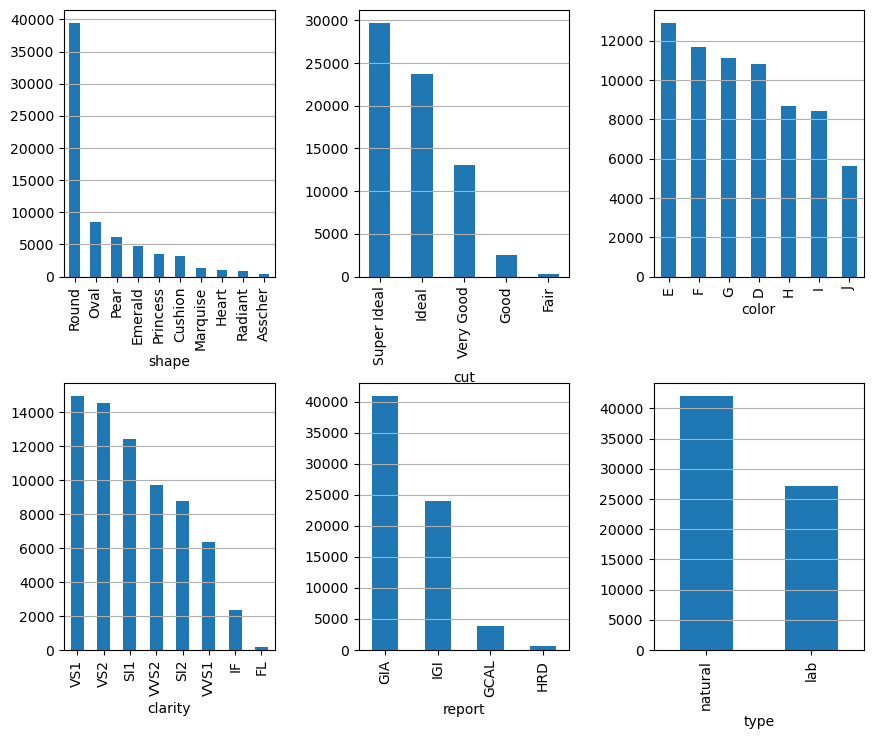

In [13]:
plt.figure(figsize=(10, 8))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
for i in range(0, len(categorical)):
    plt.subplot(2, 3, i+1)
    df_train_full[categorical[i]].value_counts().plot.bar()
    plt.grid(axis='y')

### Numerical features

<Axes: title={'center': 'carat'}>

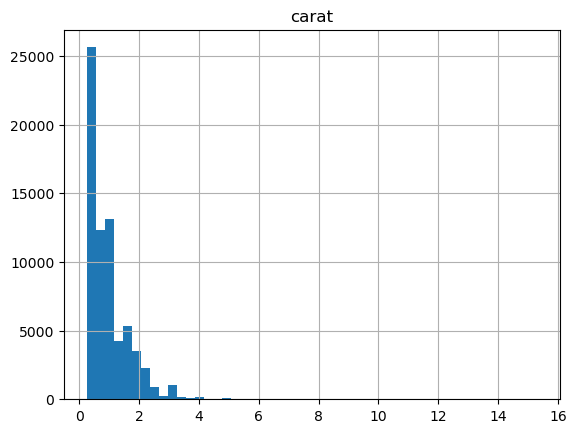

In [14]:
plt.title('carat')
df_train_full['carat'].hist(bins=50)

### Target feature

<Axes: title={'center': 'price'}>

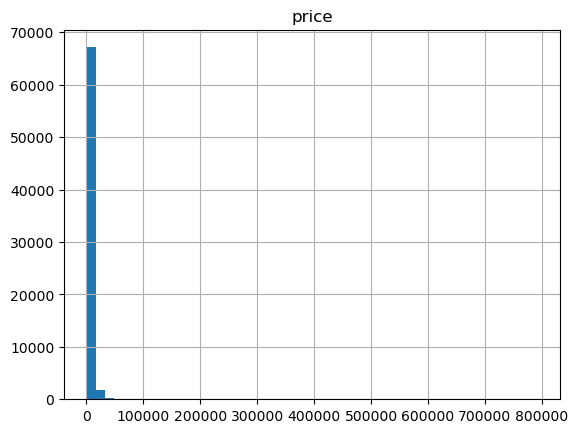

In [15]:
plt.title('price')
plt.grid()
df_train_full['price'].hist(bins=50)

<Axes: xlabel='price'>

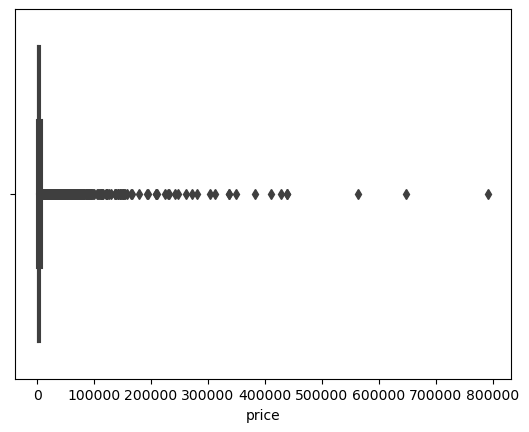

In [16]:
sns.boxplot(x='price', data= df_train_full)

### Feature importance

#### Mutual information

In [17]:
from sklearn.metrics import mutual_info_score
def mutual_info(series):
    return mutual_info_score(series, df_train_full.price)

In [18]:
mi = df_train_full[categorical].apply(mutual_info)
mi.sort_values(ascending=False)

shape      0.190669
color      0.150532
clarity    0.145702
report     0.094260
cut        0.080056
type       0.062705
dtype: float64

#### Correlation

<Axes: >

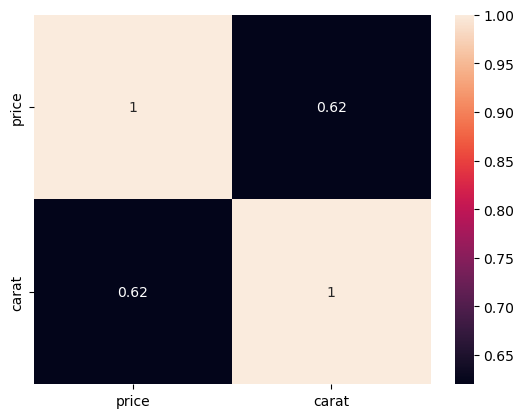

In [19]:
corr_matrix = df_train_full.corr(numeric_only=True).round(2)
sns.heatmap(corr_matrix, annot=True)

## Data preparation

In [32]:
y_train= df_train['price']
y_test =df_test['price']
y_val =df_val['price']

X_train = df_train.drop('price', axis=1)
X_test = df_test.drop('price', axis=1)
X_val = df_val.drop('price', axis=1)

In [33]:
y_train = np.log(y_train)
y_test = np.log(y_test)
y_val = np.log(y_val)

<Axes: >

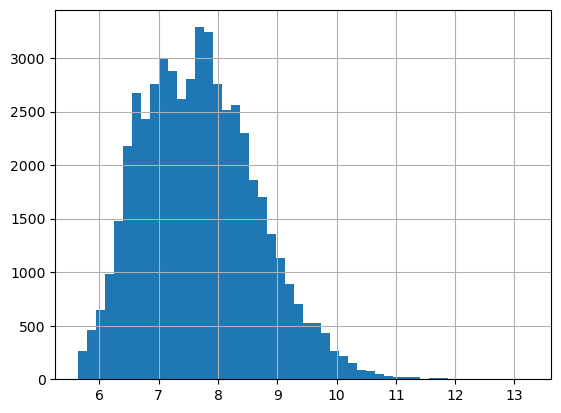

In [34]:
y_train.hist(bins=50)

### Encoding categorical features

#### Encoding ordinal features with OrdinalEncoder

In [36]:
from sklearn.preprocessing import OrdinalEncoder



ordered = ['cut', 'color', 'clarity']

categories =[['Fair','Good', 'Very Good', 'Ideal', 'Super Ideal'],
            ['D','E','F','G', 'H', 'I', 'J'],
            ['FL', 'IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2']]
             
encoder = OrdinalEncoder(categories=categories)


X_train[ordered] = encoder.fit_transform(X_train[ordered])
X_val[ordered] = encoder.transform(X_val[ordered])

#### Encoding nominal features with DictVectorizer

In [37]:
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer(sparse=False)

train_dict = X_train.to_dict(orient='records')

val_dict = X_val.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

X_val = dv.transform(val_dict)

## Models training

In [38]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
val_results = pd.DataFrame(columns=['model', 'params', 'rmse', 'r2'])
model_results = pd.DataFrame(columns=['params',  'rmse', 'r2'])

### Lasso regression

In [39]:
from sklearn.linear_model import Lasso
for a in [0.001, 0.01, 0.1, 1, 1.2, 1.5]:
    ls = Lasso(random_state=4, alpha = a)
    ls.fit(X_train, y_train)
    y_pred = ls.predict(X_val)
    rmse = mean_squared_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)
    model_results.loc[len(model_results)] = ['alpha=' +str(a), rmse, r2]

In [40]:
model_results

,params,rmse,r2
0,alpha=0.001,0.206902,0.779961
1,alpha=0.01,0.207920,0.778879
2,alpha=0.1,0.306693,0.673834
3,alpha=1,0.940369,-0.000076
4,alpha=1.2,0.940369,-0.000076
5,alpha=1.5,0.940369,-0.000076


In [41]:
val_results.loc[len(val_results)] = ['Lasso Regression']+model_results.iloc[0].to_list()

### Ridge regression

In [42]:
from sklearn.linear_model import Ridge
model_results.drop(model_results.index , inplace=True)

for a in [0.001, 0.01, 0.1, 1, 1.2, 1.5]:
    rd = Ridge(random_state=4, alpha = a)
    rd.fit(X_train, y_train)
    y_pred = rd.predict(X_val)
    rmse = mean_squared_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)
    model_results.loc[len(model_results)] = ['alpha=' +str(a), rmse, r2]

In [43]:
model_results

,params,rmse,r2
0,alpha=0.001,0.206612,0.780270
1,alpha=0.01,0.206612,0.780270
2,alpha=0.1,0.206611,0.780270
3,alpha=1,0.206607,0.780275
4,alpha=1.2,0.206606,0.780276
5,alpha=1.5,0.206605,0.780277


In [44]:
val_results.loc[len(val_results)] = ['Lasso Regression']+model_results.iloc[5].to_list()

### Decision tree regression

In [45]:
from sklearn.tree import DecisionTreeRegressor
model_results.drop(model_results.index , inplace=True)

for depth in [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 17, 20, None]:
    dt = DecisionTreeRegressor()
    dt = DecisionTreeRegressor(max_depth=depth, random_state=4)
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_val)
    rmse = mean_squared_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)
    model_results.loc[len(model_results)] = ['max_depth=' +str(depth), rmse, r2]

In [46]:
model_results.sort_values(by=['r2'], ascending=False)

,params,rmse,r2
9,max_depth=15,0.013157,0.986007
10,max_depth=17,0.013691,0.985439
11,max_depth=20,0.014316,0.984775
12,max_depth=None,0.014451,0.984632
8,max_depth=10,0.017387,0.981509
7,max_depth=9,0.021176,0.977479
6,max_depth=8,0.026521,0.971795
5,max_depth=7,0.035072,0.962701
4,max_depth=6,0.048004,0.948948
3,max_depth=5,0.066740,0.929022


In [47]:
val_results.loc[len(val_results)] = ['DecisionTreeRegressor']+model_results.iloc[9].to_list()

### Random forest regression

In [48]:
from sklearn.ensemble import RandomForestRegressor
model_results.drop(model_results.index , inplace=True)
for depth in [13, 15, 17]:
    for n in [100, 150, 200]:
        rf = RandomForestRegressor(n_estimators=n, max_depth=depth, random_state=4,)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_val)
        rmse = mean_squared_error(y_val, y_pred)
        r2 = r2_score(y_val, y_pred)
        model_results.loc[len(model_results)] = ['max_depth='+ str(depth) +' n_estimators=' +str(n), rmse, r2]

In [49]:
model_results.sort_values(by=['r2'], ascending=False)

,params,rmse,r2
2,max_depth=13 n_estimators=200,0.010136,0.989220
5,max_depth=15 n_estimators=200,0.010140,0.989216
0,max_depth=13 n_estimators=100,0.010141,0.989216
1,max_depth=13 n_estimators=150,0.010142,0.989214
4,max_depth=15 n_estimators=150,0.010144,0.989212
3,max_depth=15 n_estimators=100,0.010153,0.989202
8,max_depth=17 n_estimators=200,0.010448,0.988888
7,max_depth=17 n_estimators=150,0.010452,0.988885
6,max_depth=17 n_estimators=100,0.010462,0.988874


All models have nearly the same results. So I chose the one with smaller parameter values because it will train quicker and have a smaller size.

In [50]:
val_results.loc[len(val_results)] = ['RandomForestRegressor']+model_results.iloc[0].to_list()

In [51]:
val_results

,model,params,rmse,r2
0,Lasso Regression,alpha=0.001,0.206902,0.779961
1,Lasso Regression,alpha=1.5,0.206605,0.780277
2,DecisionTreeRegressor,max_depth=15,0.013157,0.986007
3,RandomForestRegressor,max_depth=13 n_estimators=100,0.010141,0.989216


## Final model training

In [52]:
y_train= df_train_full['price']
y_train = np.log(y_train)
X_train = df_train_full.drop('price', axis=1)

X_train[ordered] = encoder.fit_transform(X_train[ordered])
X_test[ordered] = encoder.transform(X_test[ordered])

dv = DictVectorizer(sparse=False)

train_dict = X_train.to_dict(orient='records')
test_dict = X_test.to_dict(orient='records')

X_train = dv.fit_transform(train_dict)
X_test = dv.transform(test_dict)

In [53]:
model = RandomForestRegressor(random_state=4, max_depth=13, n_estimators=100)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=13, random_state=4)

In [54]:
y_pred = model.predict(X_test)
print("RMSE:",  mean_squared_error(y_test, y_pred))
print("R2:", r2_score(y_test, y_pred))

RMSE: 0.010064958450439206
R2: 0.9894663674008555
